This is a short guide on how to use the module microfluidics.py designed to write microfluidics designs in dxf format.
The module requires the following modules:
1. numpy
2. shapely
3. dxfwrite
All of them can be installed using the command pip3 install xxxx (or with sudo)

All elements that are written in the dxf file are polygons. Since operations have to be performed on them, these polygons always defined as 2D numpy arrays in this module. Sometimes one element of the design is composed of several polygons and thus all those polygons are grouped into a list. In the module, a single element polygon or a list of polygons is called a FEATURE. Most functions take or return such features.

Next we give a simple example showing how to produce a minimal design.

First, define a layer into which to write a feature. Give it a name, a color and say whether the full layer should be rotated (for multi-layer processing)

In [1]:
from dxfwrite import DXFEngine as dxf
import numpy as np
import matplotlib.pyplot as plt
import microfluidics as mf
from copy import deepcopy

%matplotlib inline
import mpld3
mpld3.enable_notebook()

Seond, define a layer into which to write a feature. Give it a name, a color and say whether the full layer should be rotated (for multi-layer processing)

In [2]:
my_layer = {'name':'first_layer','color':1, 'inversion':0}
my_layer2 = {'name':'second_layer','color':2, 'inversion':0}

Give the coordinates of a simple tube, its radius as well as the curvature of that tube at each point.

In [3]:
tube_coord = [[0,0],[1000,0],[1000,1000]]
tube_rad = 20
tube_curv = [0,50,0]

Create the tube feature by calling define_tube()

In [4]:
simple_tube = mf.define_tube(tube_coord,tube_curv, tube_rad)

Create an empty desing.

Create an empty drawing at the place and under the name you want.

Add your layers to your drawing

In [14]:
design = {}
drawing = dxf.drawing('/Users/guillaume/Desktop/My_drawing.dxf')
drawing.add_layer(my_layer['name'], color=my_layer['color'])
drawing.add_layer(my_layer2['name'], color=my_layer['color'])

Add the feature to the design under the name that you want. You need to provde the 'coord' of the feature, which is the feature itself, the layer, and optionally give an axis around which to mirror your feature

In [132]:
design['my_first_feature'] = {'coord': simple_tube, 'layer': my_layer, 'mirror': 0}

Add other features

In [133]:
channel_array = mf.channel_array(length=100,num=2,origin=[0,0],space=100,space_series=20,subsampling=1,widths=[10,15])
design['my_second_feature'] = {'coord': channel_array,'layer': my_layer2, 'mirror': 0}
                                                         

Finally draw your design

In [134]:
mf.draw_design(x,drawing)

Then you can move around your design and/or make copies of it at different places. USE deepcopy() TO MAKE COPIES OF YOUR DESIGN, TO AVOID MODIFYING COORDINATES SERIALLY.
Then add the moved desing to the drawing

In [135]:
full_design = [design]
position = np.array([-1500,-300])
design_moved = mf.set_design_origin(deepcopy(design),position)
full_design.append(design_moved)
position = np.array([2000,300])
design_moved = mf.set_design_origin(deepcopy(design),position)
full_design.append(design_moved)

for x in full_design:
    mf.draw_design(x,drawing)

Finally close your drawing to save it.

In [136]:
drawing.save()

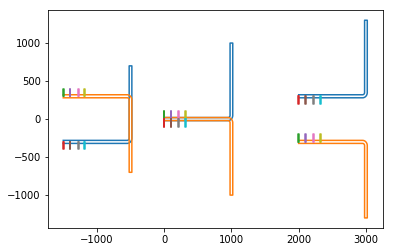

In [137]:
for x in full_design:
    for elem in x:
        if type(x[elem]['coord']) is not list:
            toplot = [x[elem]['coord']]
        else:
            toplot = x[elem]['coord']
        for tp in toplot:
            plt.plot(tp[:,0], tp[:,1])
            if 'inversion' in x[elem]['layer']:
                flipped = mf.flip_feature(tp,0)
                plt.plot(flipped[:,0], flipped[:,1])
plt.show()